In [1]:
import pandas as pd
import matplotlib.pyplot as plt

rf = pd.read_csv("/Users/arsenpankiv/Desktop/Python_practice/small_dataset.csv")
rf["date"] = pd.to_datetime(rf["date"])


In [2]:
"""let's do a count of job titles """
rf.groupby("job_title").size()
"""or we may use another function"""
rf.pivot_table(index="job_title",aggfunc="size")

job_title
Database Administrator     8
Operations Analyst         7
Statistician              11
dtype: int64

In [3]:
# rf.pivot_table(values="mean_salary",index="job_title",aggfunc="median")

"""or"""

rf.groupby("job_title")["mean_salary"].median()

job_title
Database Administrator    20911.0
Operations Analyst        21549.0
Statistician              21386.0
Name: mean_salary, dtype: float64

In [4]:
"""let's now break it down by the area location """
"""index for the rows"""
rf.pivot_table(values = "mean_salary",index="area",columns="job_title",aggfunc="mean")



job_title,Database Administrator,Operations Analyst,Statistician
area,,,
barking and dagenham,23620.0,NaN,NaN
bexley,NaN,NaN,21386.0
brent,21044.0,NaN,20911.0
bromley,NaN,NaN,21293.0
camden,NaN,NaN,30249.0
city of london,NaN,48922.0,NaN
croydon,NaN,NaN,22205.0
ealing,NaN,NaN,25046.0
england,21561.0,NaN,NaN


Brent - databease administrator
median = 20911, 23128, 19093
sort = 19093, 20911, 23128
 Median = 20911

 mean:
 20911+23128+19093=63132
 63132÷3=21044

In [5]:
"""let's now take the first top 2 areas"""

rf["area"].value_counts()

top6 = rf["area"].value_counts().head(4)


"""but we only care about index column not values"""

top61 = rf["area"].value_counts().head(2).index
print(top61)


title_salary_ctr = rf.pivot_table(
    values = "mean_salary",
    index="area",
    columns="job_title",
    aggfunc="mean")

print(title_salary_ctr)
title_salary_ctr = title_salary_ctr.loc[top61]

Index(['brent', 'city of london'], dtype='object', name='area')
job_title             Database Administrator  Operations Analyst  Statistician
area                                                                          
barking and dagenham                 23620.0                 NaN           NaN
bexley                                   NaN                 NaN       21386.0
brent                                21044.0                 NaN       20911.0
bromley                                  NaN                 NaN       21293.0
camden                                   NaN                 NaN       30249.0
city of london                           NaN             48922.0           NaN
croydon                                  NaN                 NaN       22205.0
ealing                                   NaN                 NaN       25046.0
england                              21561.0                 NaN           NaN
england and wales                        NaN             21549.0   

In [57]:


"""we take only the first two area because the following areas have the missing values"""
title_salary_ctr

job_title,Database Administrator,Operations Analyst,Statistician
area,,,
brent,21044.0,NaN,20911.0
city of london,NaN,48922.0,NaN


The Error you're seeing means that some of the values in top61 (the most common areas) do not exist in the index of your title_salary_ctr pivot table.

title_salary_ctr - includes only the areas that actually have salary data for each job title.

But rf["area"].value_counts().head(6).index may include areas that don't appear in the pivot table (because maybe those areas have NaN or missing salaries for some jobs).





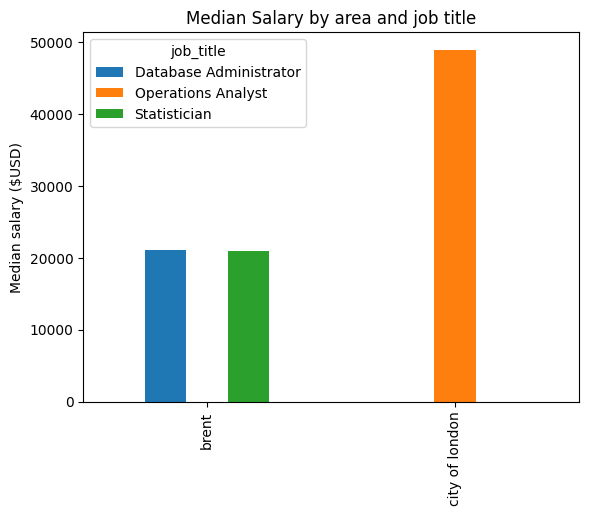

In [59]:
"""let's now plot a bar chart"""

title_salary_ctr.plot(kind="bar")
plt.xlabel("")
plt.ylabel("Median salary ($USD)")
plt.title("Median Salary by area and job title")
plt.show()